# NLST Demographic Info

Handle the demographic information columns (there's so many) before examining performance.

In [16]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utils

## directory where results are
LOCAL_PC = False
root_dir = "/mnt/w" if LOCAL_PC else "/data/bodyct"
EXPERIMENT_DIR = f"{root_dir}/experiments/lung-malignancy-fairness-shaurya"
NLST_PREDS = f"{EXPERIMENT_DIR}/nlst-preds"

NLST_PREDS_LOCAL = "/mnt/c/Users/shaur/OneDrive - Radboudumc/Documents - Master - Shaurya Gaur/General/Malignancy-Estimation Results/nlst"
NLST_PREDS = NLST_PREDS_LOCAL ## Comment out if not using Teams backup (aka Chansey is up :)

## Load Demographic Info and Choose Rows Based on Patients

In [5]:
nlst_preds = pd.read_csv(f"{NLST_PREDS}/nlst_kiran_thijmen_pancan_16077.csv")
nlst_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            16077 non-null  int64  
 1   StudyDate            16077 non-null  int64  
 2   SeriesInstanceUID    16077 non-null  object 
 3   CoordX               16077 non-null  float64
 4   CoordY               16077 non-null  float64
 5   CoordZ               16077 non-null  float64
 6   LesionID             16077 non-null  int64  
 7   NoduleType           16077 non-null  object 
 8   Spiculation          16077 non-null  bool   
 9   Diameter [mm]        16077 non-null  float64
 10  Age                  16077 non-null  int64  
 11  Gender               16077 non-null  int64  
 12  FamilyHistoryLungCa  16077 non-null  bool   
 13  Emphysema            16077 non-null  bool   
 14  NoduleInUpperLung    16077 non-null  bool   
 15  NoduleCounts         16077 non-null 

In [6]:
nlst_dict_full = pd.read_csv(f"{NLST_PREDS}/participant_d040722.csv")
nlst_dict_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Columns: 356 entries, cen to evpsent
dtypes: float64(283), int64(64), object(9)
memory usage: 145.2+ MB


/tmp/ipykernel_2790/2896154133.py:1: DtypeWarning: Columns (239,240,348) have mixed types. Specify dtype option on import or set low_memory=False.
  nlst_dict_full = pd.read_csv(f"{NLST_PREDS}/participant_d040722.csv")


In [65]:
df = nlst_dict_full[nlst_dict_full['pid'].isin(nlst_preds['PatientID'])].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Columns: 356 entries, cen to evpsent
dtypes: float64(283), int64(64), object(9)
memory usage: 14.3+ MB


## Choose Demographic Columns

In [114]:
info_cols = ['pid', 'study']
df['study'].value_counts(dropna=False)

study
1    3518
2    1023
3     741
Name: count, dtype: int64

In [9]:



cols = {
    "work": [facet+job for facet in workfacets for job in worktypes],
    "disease": [facet+disease for facet in diseasefacets for disease in diseasetypes],
    "personal_cancer": [facet+cancer for facet in pcancerfacets for cancer in pcancertypes],
    "family": ['fam'+member for member in ['brother', 'sister', 'child', 'father', 'mother']],
    "alcohol": alcohol_lss+alcohol_acrin,   
}

allcols = sum([cols[k] for k in cols], start=[])
len(allcols)

140

Next up we analyze and aggregate the columns since that still leaves us about 140 at the end.

### Demographic columns

In [67]:
col_demo_cat = ['race', 'gender', 'ethnic', 'marital', 'educat']
col_demo_num = ['age', 'height', 'weight']
df[col_demo_cat + col_demo_num].isna().sum()

race        0
gender      0
ethnic      0
marital     1
educat      0
age         0
height      9
weight     12
dtype: int64

In [74]:
print(df['educat'].value_counts(dropna=False))
df['educat'].replace([8, 95, 98, 99], value=np.nan, inplace=True)
print(df['educat'].value_counts(dropna=False))

educat
3     1324
5     1201
6      833
7      757
4      711
2      276
8       88
1       81
99      10
95       1
Name: count, dtype: int64
educat
3.0    1324
5.0    1201
6.0     833
7.0     757
4.0     711
2.0     276
NaN      99
1.0      81
Name: count, dtype: int64


In [76]:
print(df['ethnic'].value_counts(dropna=False))
df['ethnic'].replace([7, 95, 98, 99], value=np.nan, inplace=True)
print(df['ethnic'].value_counts(dropna=False))

ethnic
2.0    5170
1.0      79
NaN      30
7.0       3
Name: count, dtype: int64
ethnic
2.0    5170
1.0      79
NaN      33
Name: count, dtype: int64


In [77]:
print(df['marital'].value_counts(dropna=False))
df['marital'].replace([7, 9], value=np.nan, inplace=True)
print(df['marital'].value_counts(dropna=False))

marital
2.0    3507
5.0    1014
3.0     454
1.0     233
4.0      62
9.0       6
7.0       5
NaN       1
Name: count, dtype: int64
marital
2.0    3507
5.0    1014
3.0     454
1.0     233
4.0      62
NaN      12
Name: count, dtype: int64


In [78]:
print(df['race'].value_counts(dropna=False))
df['race'].replace([7, 95, 96, 98, 99], value=np.nan, inplace=True)
print(df['race'].value_counts(dropna=False))

race
1     4882
2      195
3       93
6       59
4       20
5       19
7        6
99       5
98       1
95       1
96       1
Name: count, dtype: int64
race
1.0    4882
2.0     195
3.0      93
6.0      59
4.0      20
5.0      19
NaN      14
Name: count, dtype: int64


In [79]:
df[col_demo_cat + col_demo_num].isna().sum()

race       14
gender      0
ethnic     33
marital    12
educat     99
age         0
height      9
weight     12
dtype: int64

KeyboardInterrupt: 

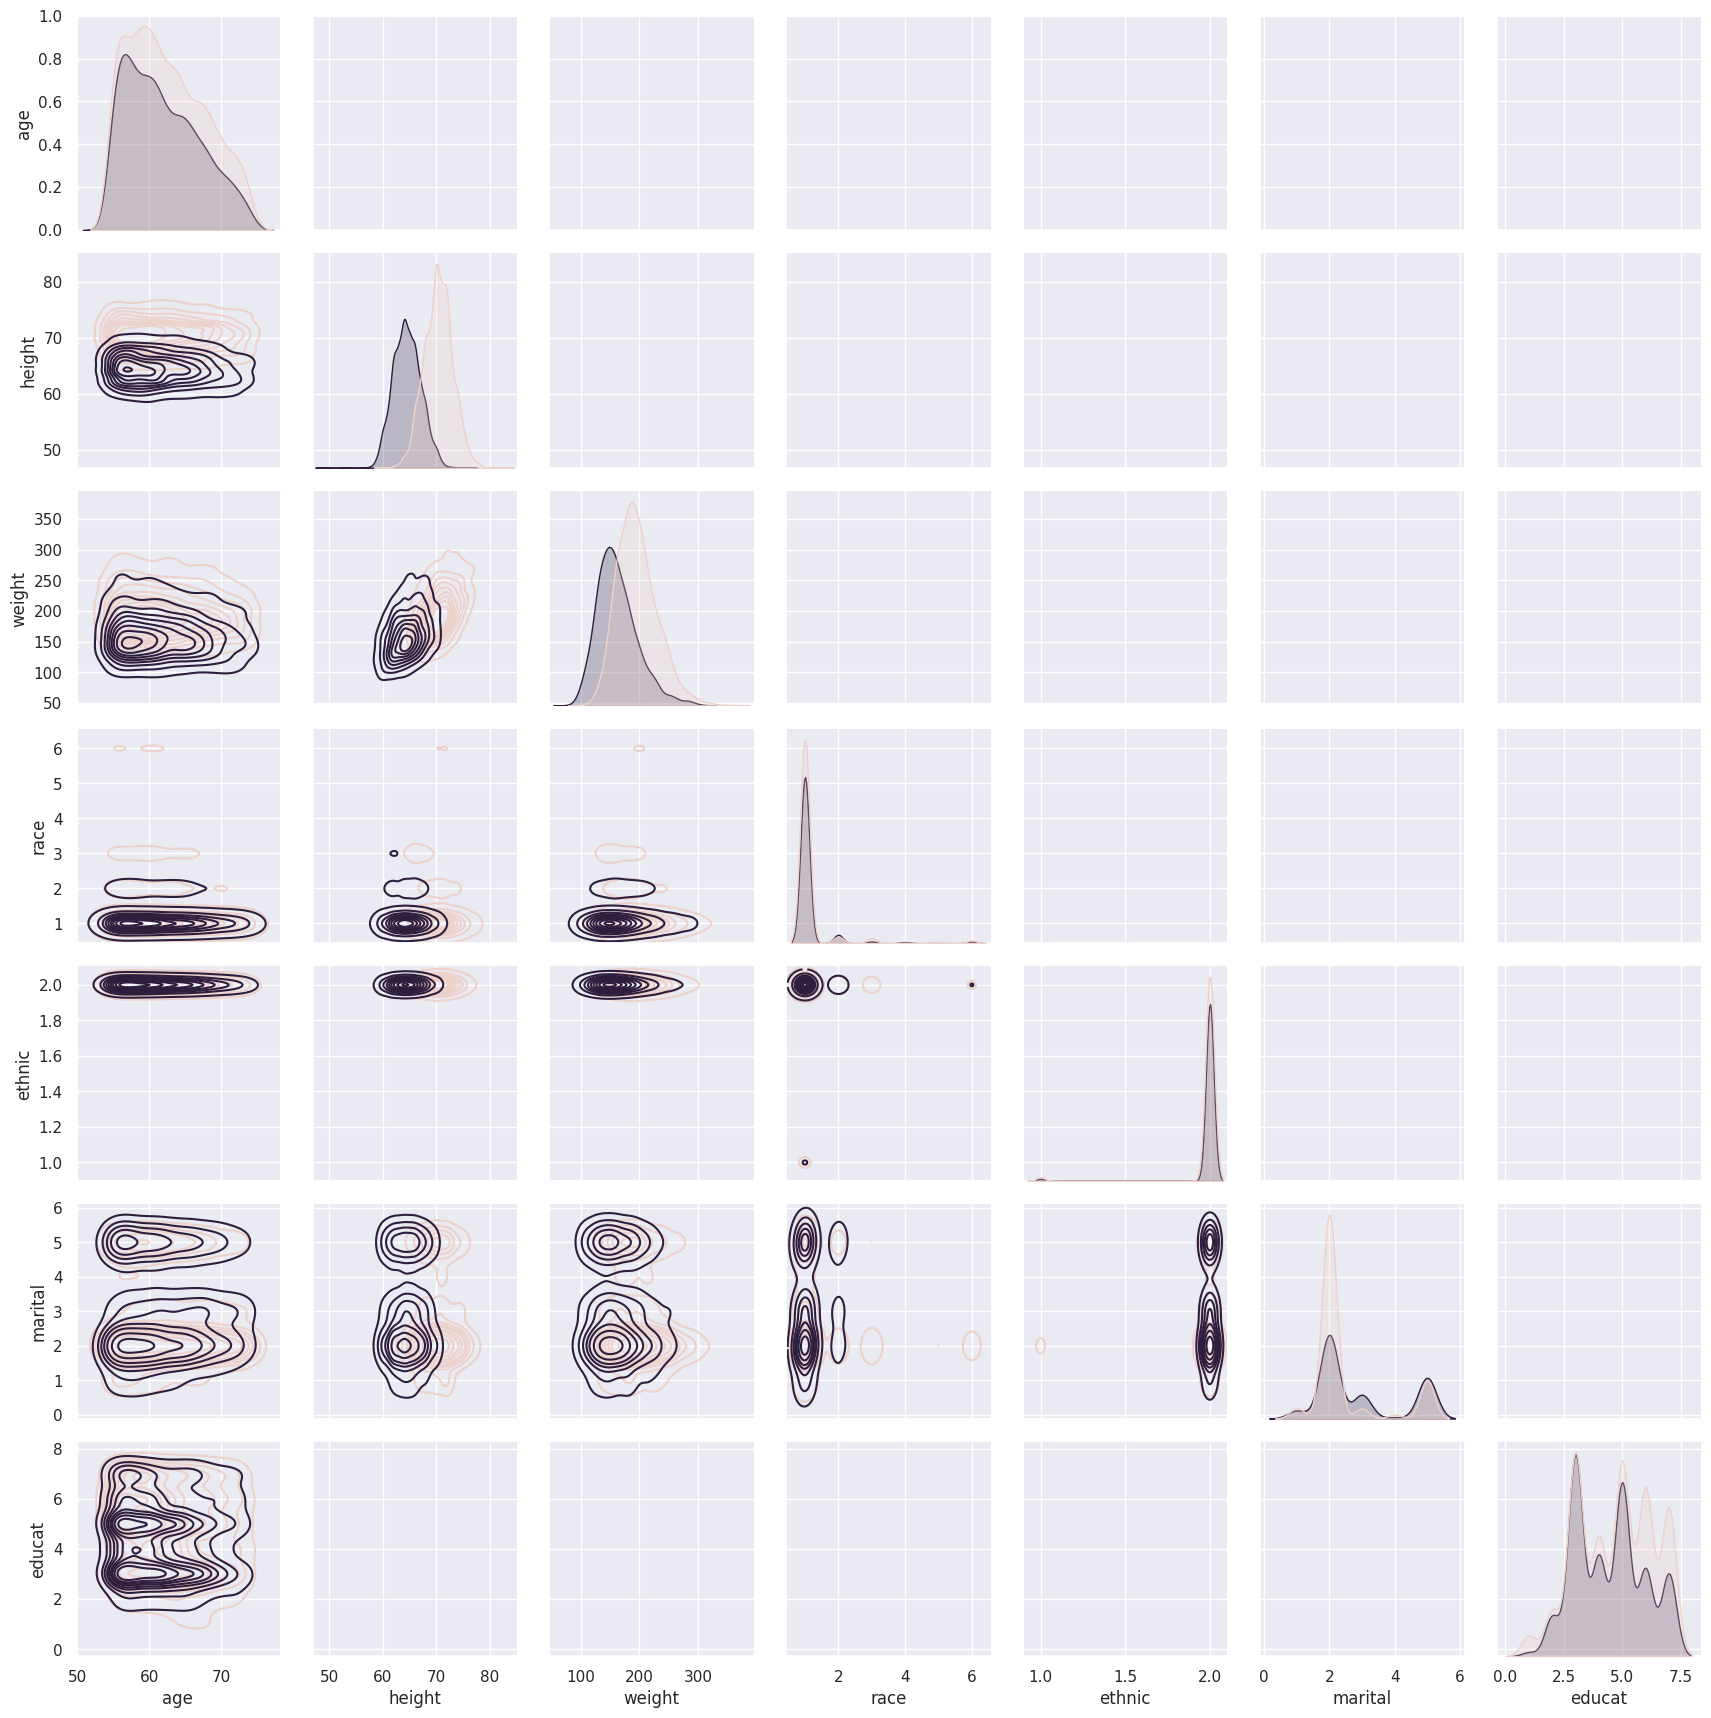

In [86]:
sns.pairplot(df[col_demo_num + col_demo_cat], hue='gender', kind='kde')

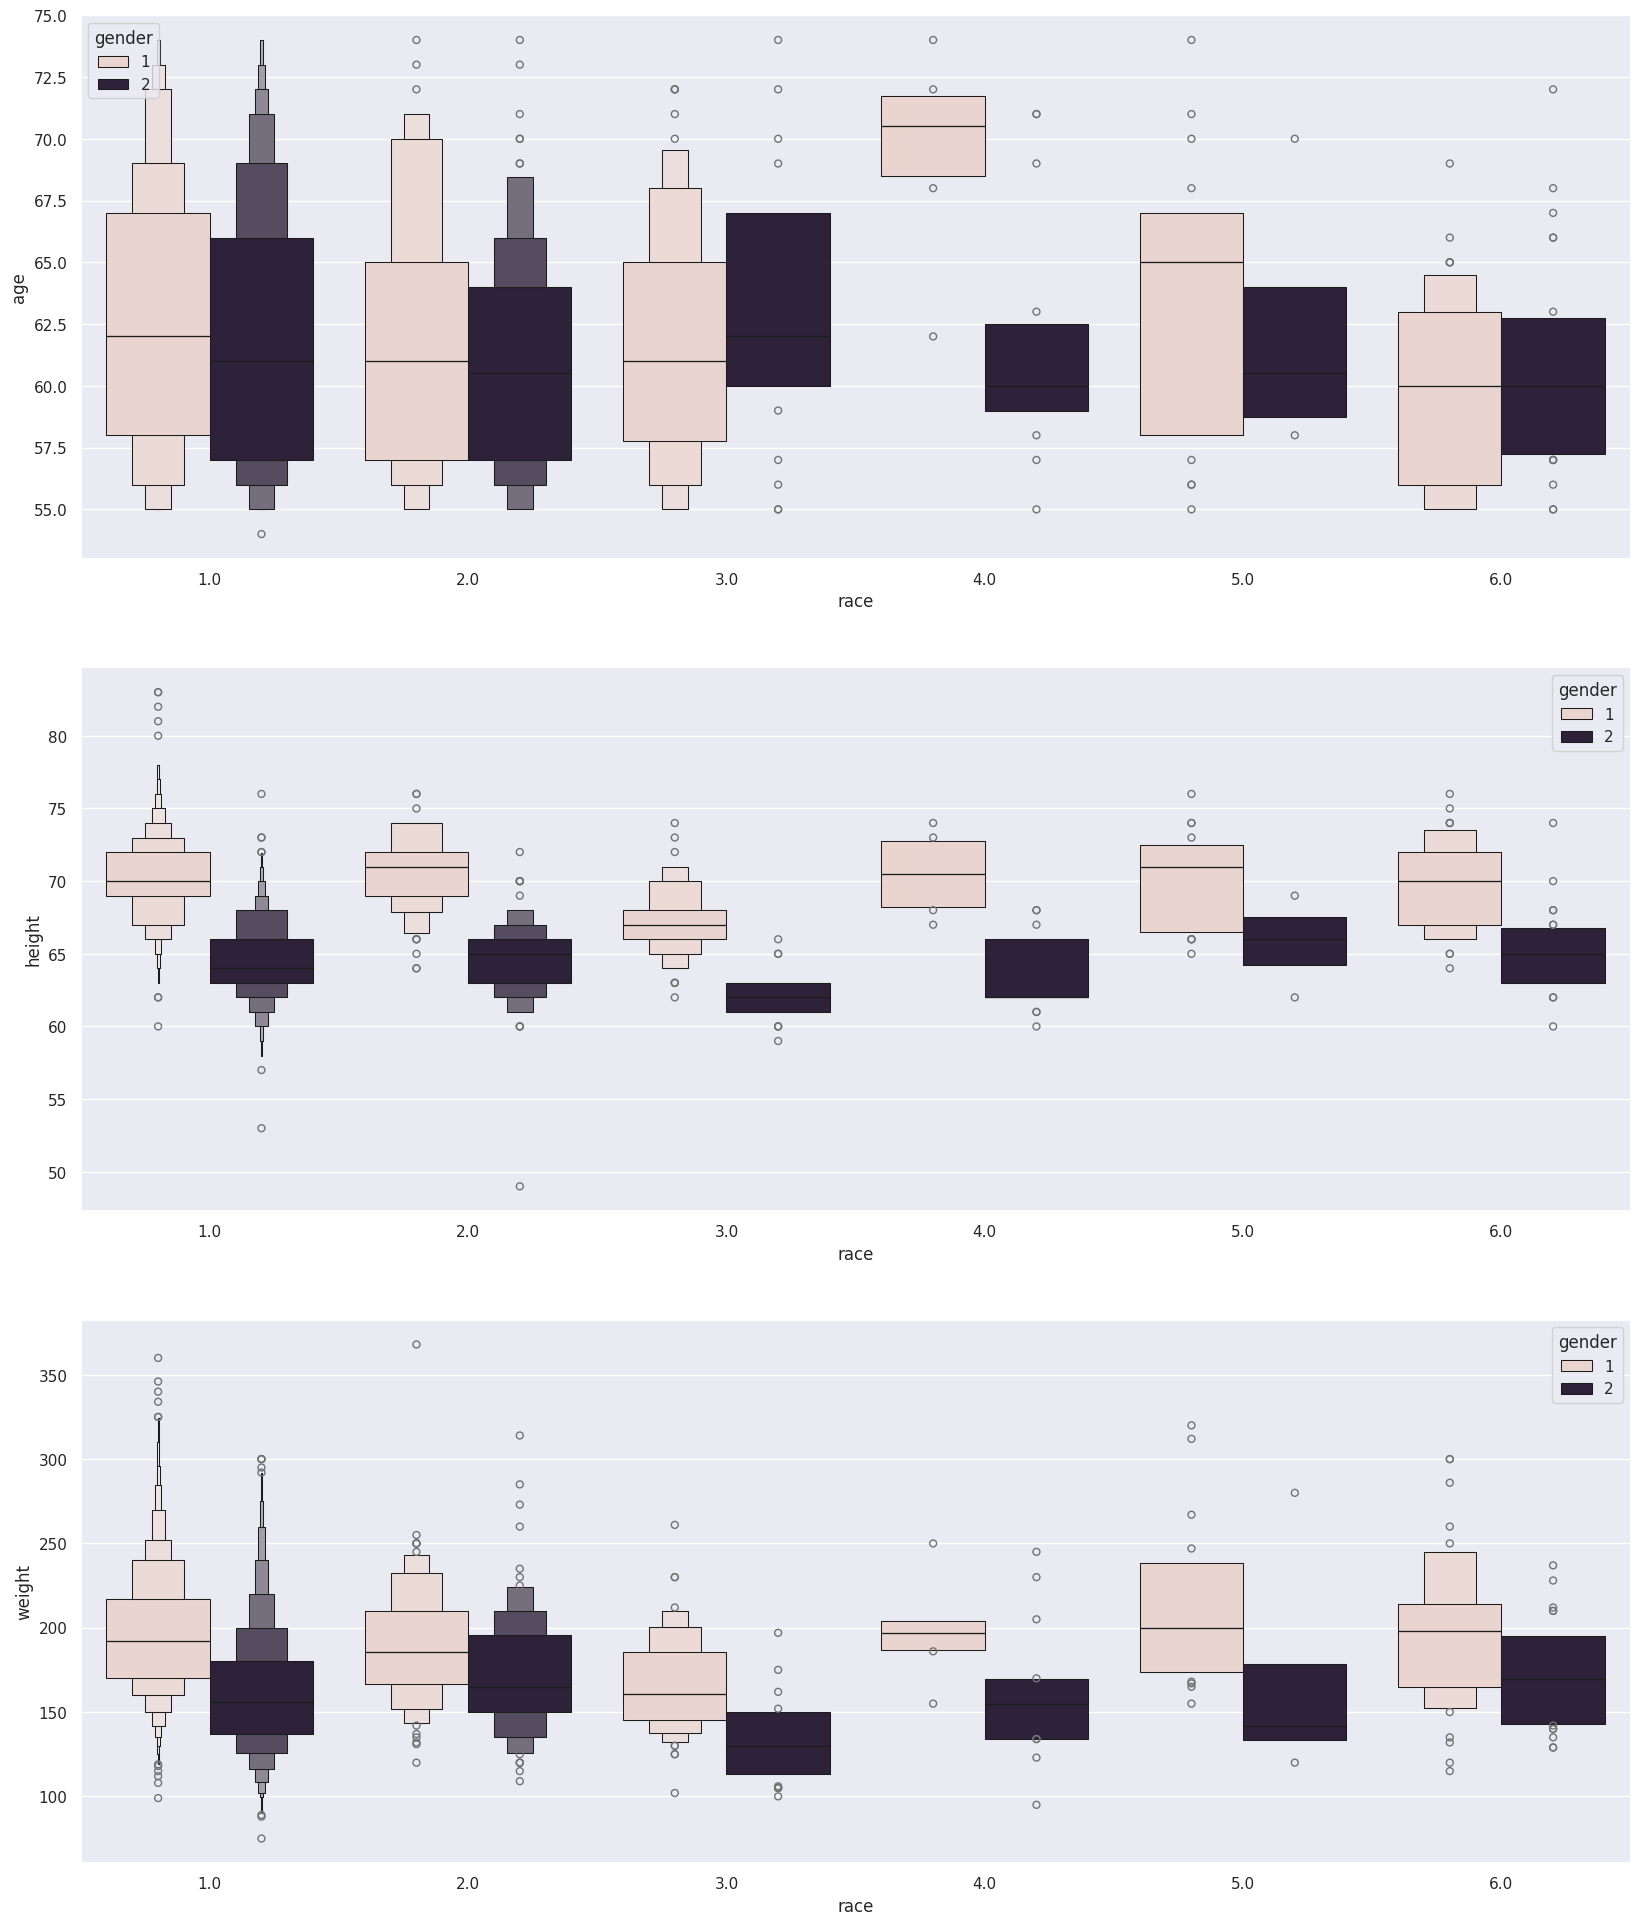

In [81]:
fig, ax = plt.subplots(3,1, figsize=(20,24))
for i, c, in enumerate(col_demo_num):
    sns.boxenplot(ax=ax[i], data=df, x='race', y=c, hue='gender')
plt.show()

In [85]:
col_demo = col_demo_cat + col_demo_num

### Smoking columns

In [92]:
col_smoke_cat =  ['cigar', 'cigsmok', 'pipe', 'smokelive', 'smokework']
col_smoke_num = ['age_quit', 'pkyr', 'smokeage', 'smokeday', 'smokeyr']
df[col_smoke_cat + col_smoke_num].isna().sum()

cigar          18
cigsmok         0
pipe           35
smokelive      23
smokework      35
age_quit     2664
pkyr            0
smokeage        0
smokeday        0
smokeyr         0
dtype: int64

Let's not include `age_quit`.

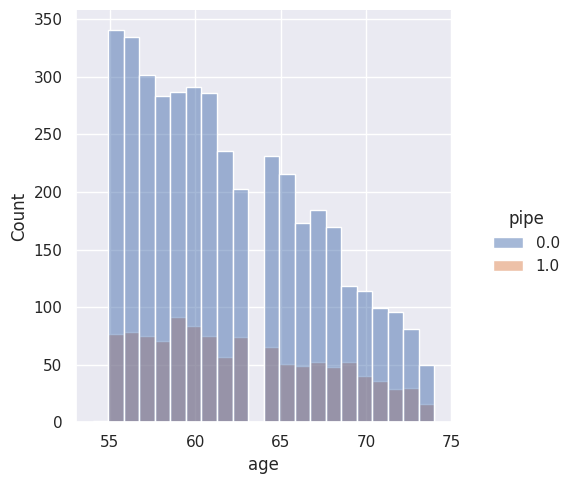

In [97]:
sns.displot(df, x='age', hue='pipe')

In [96]:
for c in col_smoke_cat:
    print(df[c].value_counts(dropna=False))

cigar
0.0    4242
1.0    1022
NaN      18
Name: count, dtype: int64
cigsmok
1    2661
0    2621
Name: count, dtype: int64
pipe
0.0    4097
1.0    1150
NaN      35
Name: count, dtype: int64
smokelive
1.0    4645
0.0     614
NaN      23
Name: count, dtype: int64
smokework
1.0    4572
0.0     675
NaN      35
Name: count, dtype: int64


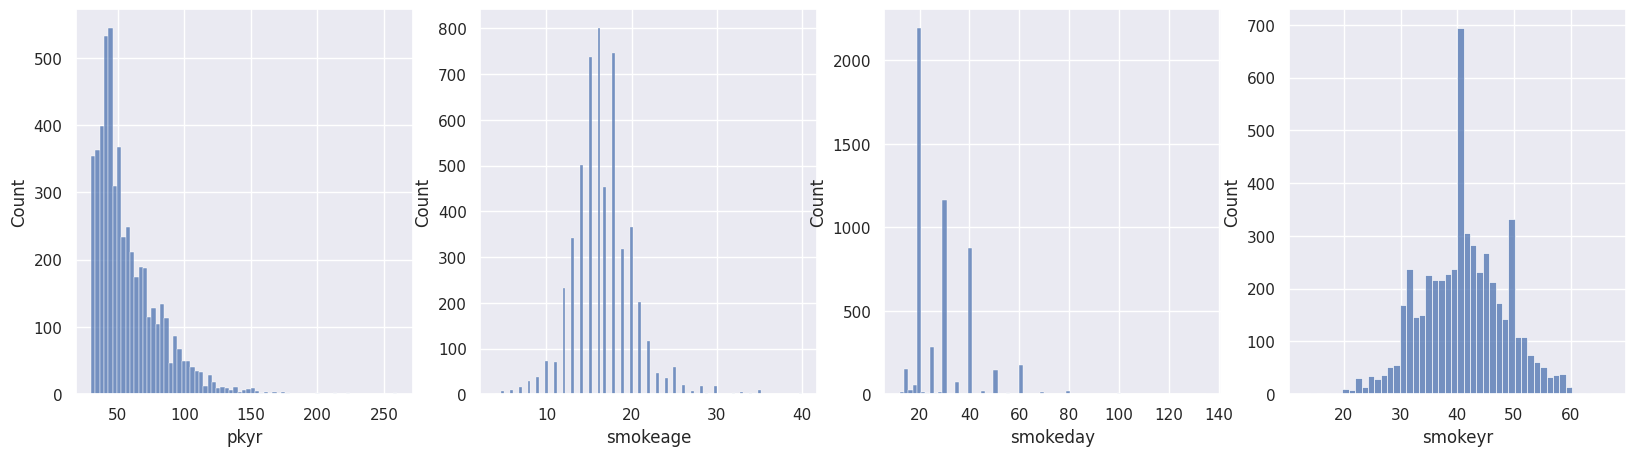

In [109]:
col_smoke_num = ['pkyr', 'smokeage', 'smokeday', 'smokeyr']
fig, ax = plt.subplots(1, len(col_smoke_num), figsize=(5*len(col_smoke_num), 5))
for i, c in enumerate(col_smoke_num):
    sns.histplot(data=df, x=c, ax=ax[i])
plt.show()

In [110]:
col_smoke = col_smoke_cat + col_smoke_num

### Work history columns

In [115]:
workfacets = ['res', 'wrk', 'yrs']
worktypes = ['asbe', 'baki', 'butc', 'chem', 'coal', 'cott', 'farm', 'fire', 'flou', 'foun', 'hard', 'pain', 'sand', 'weld']

### Disease history columns

In [116]:
diseasefacets = ['age', 'diag']
diseasetypes = ['adas', 'asbe', 'bron', 'chas', 'chro', 'copd', 'diab', 'emph', 'fibr', 'hear', 'hype', 'pneu', 'sarc', 'sili', 'stro', 'tube']

### Personal cancer history columns

In [117]:
pcancerfacets = ['age', 'canc']
pcancertypes = ['blad', 'brea', 'cerv', 'colo', 'esop', 'kidn', 'lary', 'lung', 'nasa', 'oral', 'panc', 'phar', 'stom', 'thyr', 'tran']

### Family history Lung cancer columns

In [118]:
alcohol_acrin = ['acrin_alc_curr', 'acrin_alc_ever', 'acrin_drink24hr', 'acrin_drinknum_curr', 'acrin_drinknum_form', 'acrin_drinkyrs_curr', 'acrin_drinkyrs_form', 'acrin_lastdrink']
alcohol_lss = ['lss_alcohol_freq', 'lss_alcohol_num']

### Alcohol columns

In [119]:
alcohol_acrin = ['acrin_alc_curr', 'acrin_alc_ever', 'acrin_drink24hr', 'acrin_drinknum_curr', 'acrin_drinknum_form', 'acrin_drinkyrs_curr', 'acrin_drinkyrs_form', 'acrin_lastdrink']
alcohol_lss = ['lss_alcohol_freq', 'lss_alcohol_num']